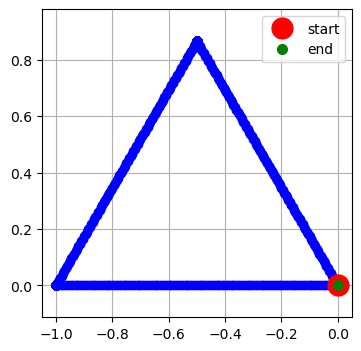

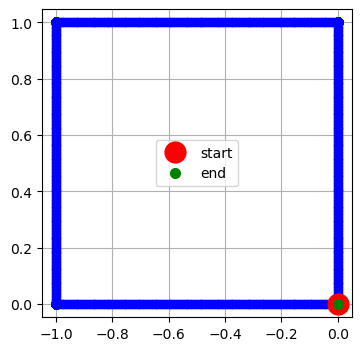

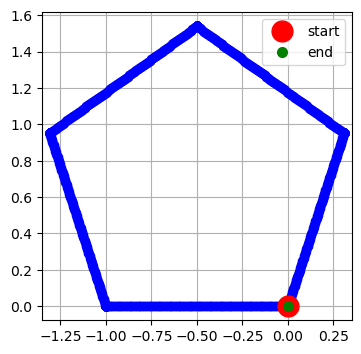

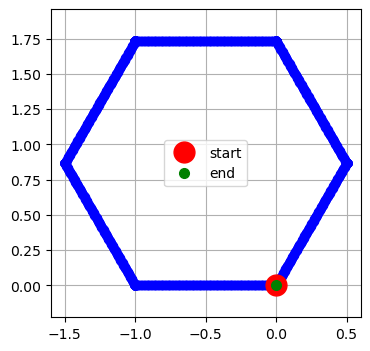

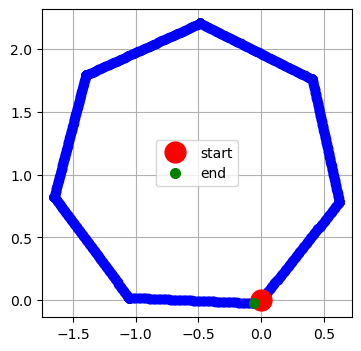

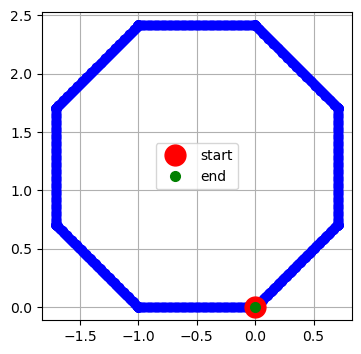

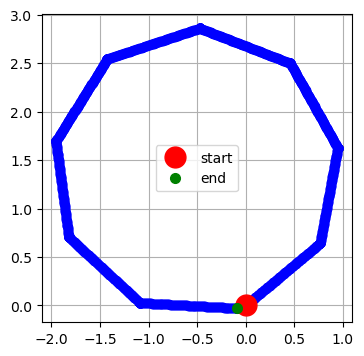

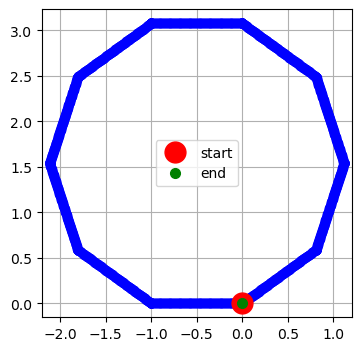

In [46]:
import math
from platform import mac_ver
import matplotlib.pyplot as plt
class Robot:
    def __init__(self, name):
        self.name = name
        self.x = 0
        self.y = 0
        self.direction = 0
        self.speed = 0
        self.dt = 0.01
        self.angular_speed = 0
        self.history = [(0, 0)]
        


    def get_position(self):
        return self.x, self.y

    def get_direction(self):
        return self.direction

    def get_speed(self):
        return self.speed

    def set_speed(self, new_speed):
        self.speed = max(0, min(new_speed, 100))
        

    def turn(self, angle):
        self.direction += angle

    def draw_square(self, side_length):
        for i in range(5):
            self.move_forward(side_length)
            self.turn(90)


    def set_direction(self, new_direction):
        self.direction = new_direction

    def update(self):
        self.distance = self.speed * self.dt
        self.angular = self.angular_speed * self.dt
        self.turn(self.angular)
        self.move_forward(self.distance)

    def simulate(self, duration):
        self.number = int(duration/self.dt)
        for i in range(self.number):
            self.update()

    def move_forward(self, distance):
        self.x += distance * math.cos(math.radians(self.direction))
        self.y += distance * math.sin(math.radians(self.direction))
        self.history.append((self.x, self.y))

    def set_speed(self, new_speed):
        self.speed = new_speed 

    def draw_path(self):
        if len(self.history) < 2:
            return "Не хватает данных"
        else:
            self.x_coords = [pos[0] for pos in self.history]
            self.y_coords = [pos[1] for pos in self.history]
            plt.figure(figsize=(4, 4))
            plt.plot(self.x_coords, self.y_coords, 'b-o')
            plt.plot(self.x_coords[0], self.y_coords[0], 'ro', label='start',  markersize=15)
            plt.plot(self.x_coords[-1], self.y_coords[-1], 'go', label='end',  markersize=7)
            plt.axis('equal')
            plt.grid(True)
            plt.legend()
            plt.show()

    def get_angular_speed(self):
        return self.angular_speed

    def set_angular_speed(self, new_angular_speed):
        self.angular_speed = max(-180, min(180, new_angular_speed))

    def move_in_circle(self, radius, period):
        self.distance = 2*radius*math.pi
        self.speed = self.distance / period
        self.set_speed(self.speed)
        self.angular_speed = 360/period
        self.set_angular_speed(self.angular_speed)
        self.simulate(period)

    def n_angular(self, n_sides, sd, ms, tas):
        self.direction = 360 / n_sides
        self.t_move = sd/ms
        self.t_turn = self.direction / tas
        for _ in range(n_sides):
        # Движение
            self.set_speed(ms)
            self.set_angular_speed(0)
            self.simulate(self.t_move)
        
        # Поворот
            self.set_speed(0)
            self.set_angular_speed(tas)
            self.simulate(self.t_turn)

       # self.set_speed(0)
        #self.set_angular_speed(0)

    def info(self):
        return f"Робот - {self.name}, находится в координатах - {self.x, self.y}, направление на {self.direction} градусов, скорость - {self.speed}"



for i in range(3, 11):
    final_robot = Robot("Чемпион")
    final_robot.n_angular(i, 1, 1, 60)
    final_robot.draw_path()






In [ ]:
# ПРОВЕРКА: Повороты
robot = Robot("Поворотник")
print(f"Начальное направление: {robot.get_direction()}°")

# Поворот против часовой стрелки
robot.turn(90)
print(f"После поворота на 90°: {robot.get_direction()}°")  # Ожидаем: 90

# Поворот по часовой стрелке
robot.turn(-45)
print(f"После поворота на -45°: {robot.get_direction()}°") # Ожидаем: 45

# Большой поворот (больше 360)
robot.turn(400)
print(f"После поворота на 400°: {robot.get_direction()}°") # Ожидаем: 85 (45 + 400 = 445; 445 % 360 = 85)

# Поворот в отрицательные значения
robot.turn(-100)
print(f"После поворота на -100°: {robot.get_direction()}°") # Ожидаем: 345 (85 - 100 = -15; -15 % 360 = 345)